# Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
game = pd.read_csv('vgames2_clean.csv', index_col = 0)
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [3]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


# 지역에 따라 선호하는 장르가 다를까?

## Data Formatting

In [4]:
mean = game.groupby(['Genre']).mean()
max_mean = game.groupby(['Genre']).mean().max()
na_max = max_mean['NA_Sales']
eu_max = max_mean['EU_Sales']
jp_max = max_mean['JP_Sales']
other_max = max_mean['Other_Sales']
total_max = max_mean['Total_Sales']

print(mean[mean['NA_Sales'] == na_max])
print(mean[mean['EU_Sales'] == eu_max])
print(mean[mean['JP_Sales'] == jp_max])
print(mean[mean['Other_Sales'] == other_max])
print(mean[mean['Total_Sales'] == total_max])

                 Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Genre                                                                        
Platform  2003.804124  0.510172  0.229817  0.149519     0.058935     0.948442
                Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Genre                                                                       
Shooter  2005.921094  0.448813  0.242367  0.029828     0.079578     0.800586
                     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Genre                                                                  
Role-Playing  2007.057338  0.217584  0.124976  0.234082     0.038724   

              Total_Sales  
Genre                      
Role-Playing     0.615365  
                Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Genre                                                                       
Shooter  2005.921094  0.448813  0.242367  0.029828     0.079578     0.800586
   

## Pie Chart Visualization

In [5]:
region_df = game.groupby(['Genre']).sum().drop('Year', axis = 1)

na_df = region_df.sort_values('NA_Sales', ascending = False)['NA_Sales']
other = na_df[-5:].sum()
label = list(na_df[-5:].index)
na_df = na_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
na_df = na_df.append(sum_df)

eu_df = region_df.sort_values('EU_Sales', ascending = False)['EU_Sales']
other = eu_df[-5:].sum()
label = list(eu_df[-5:].index)
eu_df = eu_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
eu_df = eu_df.append(sum_df)


jp_df = region_df.sort_values('JP_Sales', ascending = False)['JP_Sales']
other = jp_df[-5:].sum()
label = list(jp_df[-5:].index)
jp_df = jp_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
jp_df = jp_df.append(sum_df)


other_df = region_df.sort_values('Other_Sales', ascending = False)['Other_Sales']
other = other_df[-5:].sum()
label = list(other_df[-5:].index)
other_df = other_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
other_df = other_df.append(sum_df)

/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_35397/1244042255.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_df = na_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_35397/1244042255.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eu_df = eu_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_35397/1244042255.py:23: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jp_df = jp_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_35397/1244042255.py:31: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  other_df = other_df.append(sum_df)


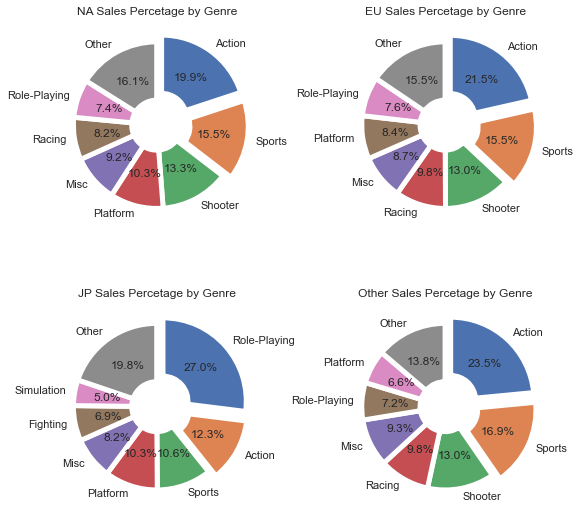

In [81]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.subplot(2,2,1)
plt.pie(na_df, labels = na_df.index, explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('NA Sales Percetage by Genre')

plt.subplot(2,2,2)
plt.pie(eu_df, labels = eu_df.index, 
        explode= explode, wedgeprops=wedgeprops, 
        autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('EU Sales Percetage by Genre')

plt.subplot(2,2,3)
plt.pie(jp_df, labels = jp_df.index, explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('JP Sales Percetage by Genre')

plt.subplot(2,2,4)
plt.pie(other_df, labels = other_df.index, explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('Other Sales Percetage by Genre')

fig.tight_layout()
plt.show()

### Pie Chart Variance

In [7]:
region_df = game.groupby(['Genre']).sum().drop('Year', axis = 1).reset_index()
na_df = region_df[['Genre', 'NA_Sales']].sort_values('NA_Sales', ascending = False)
eu_df = region_df[['Genre', 'EU_Sales']].sort_values('EU_Sales', ascending = False)
jp_df = region_df[['Genre', 'JP_Sales']].sort_values('JP_Sales', ascending = False)
other_df = region_df[['Genre', 'Other_Sales']].sort_values('Other_Sales', ascending = False)

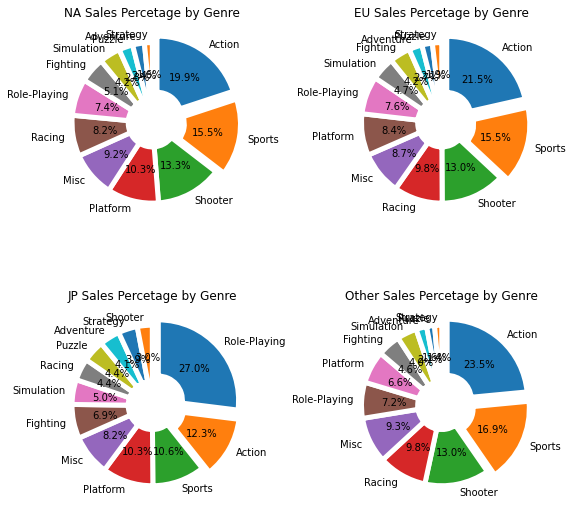

In [8]:
# 모든 칼럼 별로 그래프 그리기
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.subplot(2,2,1)
plt.pie(na_df['NA_Sales'], labels = na_df['Genre'], explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('NA Sales Percetage by Genre')

plt.subplot(2,2,2)
plt.pie(eu_df['EU_Sales'], labels = eu_df['Genre'], explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('EU Sales Percetage by Genre')

plt.subplot(2,2,3)
plt.pie(jp_df['JP_Sales'], labels = jp_df['Genre'], explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('JP Sales Percetage by Genre')

plt.subplot(2,2,4)
plt.pie(other_df['Other_Sales'], labels = other_df['Genre'], explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('Other Sales Percetage by Genre')

fig.tight_layout()
plt.show()

/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_35397/346453842.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_df = na_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_35397/346453842.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eu_df = eu_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_35397/346453842.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jp_df = jp_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_35397/346453842.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  other_df = other_df.append(sum_df)


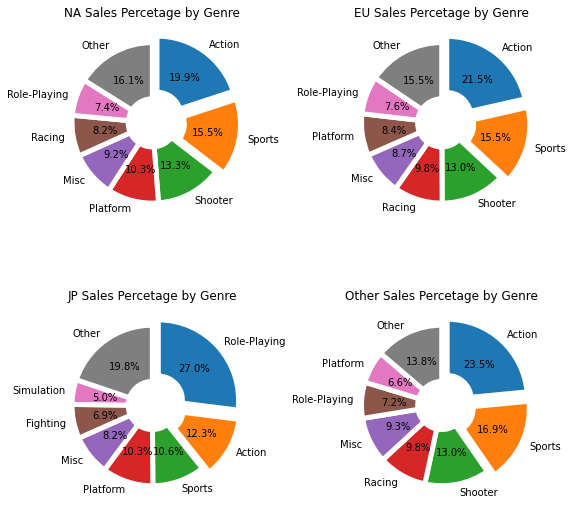

In [9]:
# Drop Top 5 Sales
# game = game.sort_values('Total_Sales', ascending = False).drop([2909, 4200, 12580, 3353, 7830], axis = 0)
region_df = game.groupby(['Genre']).sum().drop('Year', axis = 1)

na_df = region_df.sort_values('NA_Sales', ascending = False)['NA_Sales']
other = na_df[-5:].sum()
label = list(na_df[-5:].index)
na_df = na_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
na_df = na_df.append(sum_df)

eu_df = region_df.sort_values('EU_Sales', ascending = False)['EU_Sales']
other = eu_df[-5:].sum()
label = list(eu_df[-5:].index)
eu_df = eu_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
eu_df = eu_df.append(sum_df)


jp_df = region_df.sort_values('JP_Sales', ascending = False)['JP_Sales']
other = jp_df[-5:].sum()
label = list(jp_df[-5:].index)
jp_df = jp_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
jp_df = jp_df.append(sum_df)


other_df = region_df.sort_values('Other_Sales', ascending = False)['Other_Sales']
other = other_df[-5:].sum()
label = list(other_df[-5:].index)
other_df = other_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
other_df = other_df.append(sum_df)

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.subplot(2,2,1)
plt.pie(na_df, labels = na_df.index, explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('NA Sales Percetage by Genre')

plt.subplot(2,2,2)
plt.pie(eu_df, labels = eu_df.index, explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('EU Sales Percetage by Genre')

plt.subplot(2,2,3)
plt.pie(jp_df, labels = jp_df.index, explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('JP Sales Percetage by Genre')

plt.subplot(2,2,4)
plt.pie(other_df, labels = other_df.index, explode= explode, wedgeprops=wedgeprops, autopct='%.1f%%', counterclock=False, startangle = 90)
plt.title('Other Sales Percetage by Genre')

fig.tight_layout()
plt.show()

In [10]:
# NA 지역에서는 Platform
# EU 지역에서는 Shooter
# JP 지역에서는 Role-Playing
# Other 지역에서는 Shooter
# Total 지역에서는 Platform

# 연도별 유행 Heatmap

## Data Formatting

In [11]:
heatmap_df = game.groupby(['Genre', 'Year']).sum().reset_index()

In [12]:
heatmap_df

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,1980,0.32,0.02,0.00,0.00,0.34
1,Action,1981,13.86,0.81,0.00,0.12,14.79
2,Action,1982,6.07,0.38,0.00,0.05,6.50
3,Action,1983,2.67,0.17,0.00,0.02,2.86
4,Action,1984,0.80,0.19,0.83,0.03,1.85
...,...,...,...,...,...,...,...
383,Strategy,2012,0.94,0.99,1.11,0.29,3.33
384,Strategy,2013,2.39,2.47,0.82,0.64,6.32
385,Strategy,2014,0.16,0.22,0.55,0.04,0.97
386,Strategy,2015,0.57,0.98,0.15,0.12,1.82


In [13]:
heatmap_df = heatmap_df.pivot(index = 'Genre', columns = 'Year', values = 'Total_Sales')

In [14]:
heatmap_df

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,1.74,4.65,...,138.32,117.50,119.00,120.78,125.21,99.01,68.25,19.84,0.01,NaN
Adventure,NaN,NaN,NaN,0.40,NaN,NaN,NaN,4.38,NaN,NaN,...,20.67,16.57,15.88,5.90,6.61,6.09,8.01,1.79,NaN,NaN
Fighting,0.77,NaN,NaN,NaN,NaN,1.05,NaN,5.42,NaN,NaN,...,32.18,14.88,22.11,9.53,7.23,16.15,7.78,3.85,NaN,NaN
Misc,2.70,NaN,0.87,2.14,1.45,NaN,NaN,NaN,NaN,1.28,...,76.90,88.40,55.77,22.93,25.66,23.73,11.66,1.15,NaN,NaN
Platform,NaN,6.92,5.03,6.93,0.69,43.17,9.39,1.74,27.73,20.66,...,40.95,31.98,28.12,18.54,25.09,8.87,6.05,2.08,NaN,NaN
Puzzle,NaN,2.25,10.04,0.78,3.14,3.21,NaN,NaN,5.58,37.75,...,20.28,11.15,5.10,1.74,1.00,1.50,0.69,NaN,NaN,NaN
Racing,NaN,0.48,1.57,NaN,5.95,NaN,1.96,NaN,2.14,NaN,...,34.09,34.93,34.96,14.43,13.02,16.71,7.92,1.67,NaN,NaN
Role-Playing,NaN,NaN,NaN,NaN,NaN,NaN,2.52,4.65,5.88,2.20,...,47.96,70.56,53.32,47.77,30.54,45.88,36.43,6.75,0.04,NaN
Shooter,7.07,10.02,3.81,0.49,31.10,1.00,3.89,0.69,0.51,1.19,...,69.84,77.44,99.35,72.84,62.73,65.99,66.12,18.17,NaN,NaN


In [15]:
heatmap_df = heatmap_df.fillna(0)

In [16]:
cols = heatmap_df.columns
cols = cols[::-1]
np.array(cols)

array([2020, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986,
       1985, 1984, 1983, 1982, 1981, 1980])

In [17]:
heatmap_df = heatmap_df.sort_values(by = list(cols), axis = 0, ascending = False)
heatmap_df

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Simulation,0.00,0.44,0.00,0.00,0.00,0.04,0.00,0.00,0.03,0.00,...,33.55,21.90,15.31,13.37,8.68,5.54,5.61,0.39,0.00,0.29
Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.52,4.65,5.88,2.20,...,47.96,70.56,53.32,47.77,30.54,45.88,36.43,6.75,0.04,0.00
Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,1.74,4.65,...,138.32,117.50,119.00,120.78,125.21,99.01,68.25,19.84,0.01,0.00
Shooter,7.07,10.02,3.81,0.49,31.10,1.00,3.89,0.69,0.51,1.19,...,69.84,77.44,99.35,72.84,62.73,65.99,66.12,18.17,0.00,0.00
Sports,0.00,0.78,1.06,3.20,6.17,1.96,5.58,3.71,3.60,5.72,...,138.59,92.02,57.06,30.90,41.54,46.64,41.49,14.63,0.00,0.00
Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,0.00,0.00,...,32.18,14.88,22.11,9.53,7.23,16.15,7.78,3.85,0.00,0.00
Platform,0.00,6.92,5.03,6.93,0.69,43.17,9.39,1.74,27.73,20.66,...,40.95,31.98,28.12,18.54,25.09,8.87,6.05,2.08,0.00,0.00
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,0.00,0.00,...,20.67,16.57,15.88,5.90,6.61,6.09,8.01,1.79,0.00,0.00
Racing,0.00,0.48,1.57,0.00,5.95,0.00,1.96,0.00,2.14,0.00,...,34.09,34.93,34.96,14.43,13.02,16.71,7.92,1.67,0.00,0.00


In [18]:
def add_col(df, start, end):
    df[str(start) +'-' + str(end)] = 0
    for i in range(start,end + 1):
        df[str(start) +'-' + str(end)] = df[str(start) +'-' + str(end)] + df[i]
        df = df.drop(i, axis=1)
    return df

In [19]:
year_5_df = heatmap_df.copy()
year_5_df = add_col(year_5_df,1980,1984)
year_5_df = add_col(year_5_df,1985,1989)
year_5_df = add_col(year_5_df,1990,1994)
year_5_df = add_col(year_5_df,1995,1999)
year_5_df = add_col(year_5_df,2000,2004)
year_5_df = add_col(year_5_df,2005,2009)
year_5_df = add_col(year_5_df,2010,2014)
year_5_df = add_col(year_5_df,2015,2017)

year_5_df['2020'] = year_5_df[2020]
year_5_df = year_5_df.drop(2020, axis = 1)

In [20]:
year_10_df = heatmap_df.copy()
year_10_df = add_col(year_10_df,1980,1989)
year_10_df = add_col(year_10_df,1990,1999)
year_10_df = add_col(year_10_df,2000,2009)
year_10_df = add_col(year_10_df,2010,2017)

year_10_df['2020'] = year_10_df[2020]
year_10_df = year_10_df.drop(2020, axis = 1)

## HeatMap Graphs

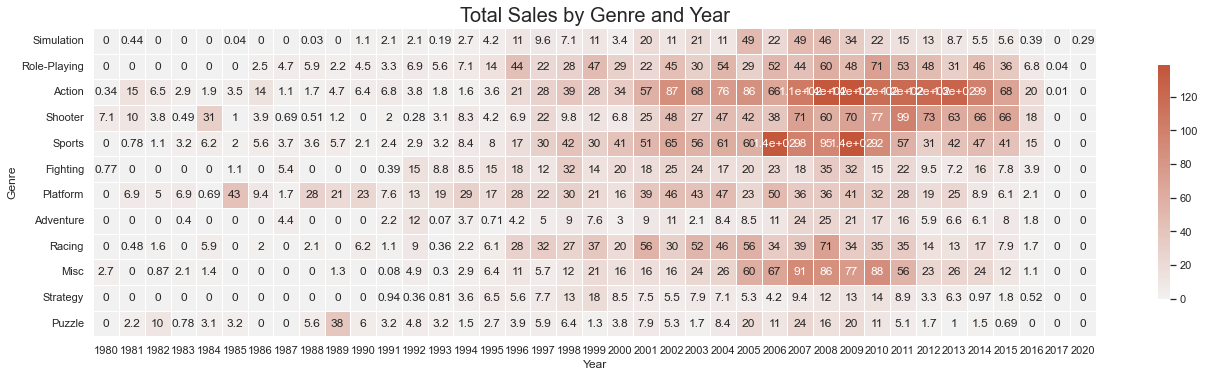

In [53]:
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(heatmap_df, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Total Sales by Genre and Year', fontsize=20)
plt.show()

ValueError: Could not interpret value `Year` for parameter `x`

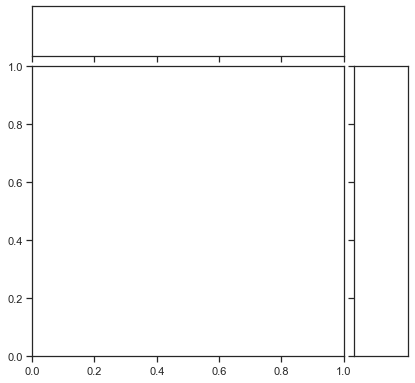

In [40]:
plt.rcParams['figure.figsize'] = [20, 8]
sns.set_theme(style='ticks')
sns.jointplot(x = 'Year',  y = 'Genre', data = heatmap_df, kind = 'hex', color = '#4CB391')
# sns.heatmap(heatmap_df, annot=False, fmt = 'g', color = '#4CB391')
plt.title('Annoteat cell with numeric value', fontsize=5)
plt.show()

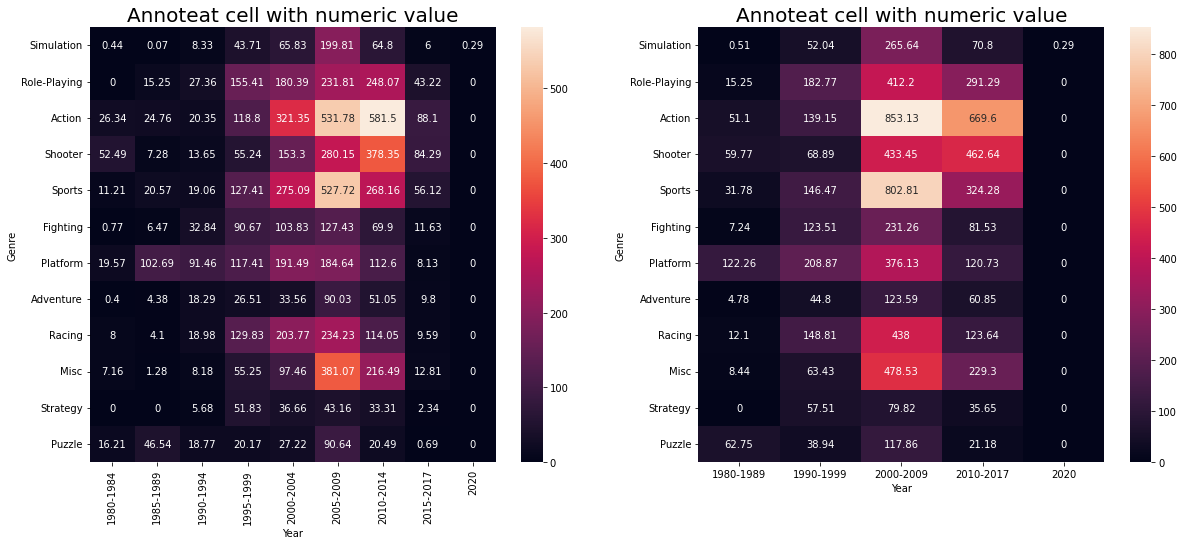

In [22]:
plt.subplot(1, 2, 1)
sns.heatmap(year_5_df, annot=True, fmt = 'g')
plt.title('Annoteat cell with numeric value', fontsize=20)

plt.subplot(1, 2, 2)  
plt.rcParams['figure.figsize'] = [16, 8]
sns.heatmap(year_10_df, annot=True, fmt = 'g')
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [23]:
top_5 = game.sort_values('Total_Sales', ascending = False)[:5]

In [24]:
top_5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [25]:
def des_game(df):
    print('----------------------------')
    print("Number of Series Game : ", len(df))
    print('-')
    print("Total NA Sales : ", df.sum()['NA_Sales'].round(2))
    print("Mean NA Sales : ", df.describe().loc['mean', 'NA_Sales'].round(2))
    print("Max NA Sales : ", df.describe().loc['max', 'NA_Sales'].round(2))
    print('-')
    print("Total EU Sales : ", df.sum()['EU_Sales'].round(2))
    print("Mean EU Sales : ", df.describe().loc['mean', 'EU_Sales'].round(2))
    print("Max EU Sales : ", df.describe().loc['max', 'EU_Sales'].round(2))
    print('-')
    print("Total JP Sales : ", df.sum()['JP_Sales'].round(2))
    print("Mean JP Sales : ", df.describe().loc['mean', 'JP_Sales'].round(2))
    print("Max JP Sales : ", df.describe().loc['max', 'JP_Sales'].round(2))
    print('-')
    print("Total Other Sales : ", df.sum()['Other_Sales'].round(2))
    print("Mean Other Sales : ", df.describe().loc['mean', 'Other_Sales'].round(2))
    print("Max Other Sales : ", df.describe().loc['max', 'Other_Sales'].round(2))
    print('-')
    print("Total Sales : ", df.sum()['Total_Sales'].round(2))
    print("Mean Total Sales : ", df.describe().loc['mean', 'Total_Sales'].round(2))
    print("Max Total Sales : ", df.describe().loc['max', 'Total_Sales'].round(2))
    print('----------------------------')

In [26]:
wii_sports = game[game['Name'].str.contains('Wii Sports')]
mario = game[game['Name'].str.contains('Mario')]
pokemon = game[game['Name'].str.contains('Pokemon')]

In [27]:
print('Game Series Mario')
des_game(mario)

Game Series Mario
----------------------------
Number of Series Game :  112
-
Total NA Sales :  277.95
Mean NA Sales :  2.48
Max NA Sales :  29.08
-
Total EU Sales :  131.17
Mean EU Sales :  1.17
Max EU Sales :  12.88
-
Total JP Sales :  116.1
Mean JP Sales :  1.04
Max JP Sales :  6.81
-
Total Other Sales :  30.06
Mean Other Sales :  0.27
Max Other Sales :  3.31
-
Total Sales :  555.28
Mean Total Sales :  4.96
Max Total Sales :  40.24
----------------------------


In [28]:
print('Game Series Pokemon')
des_game(pokemon)

Game Series Pokemon
----------------------------
Number of Series Game :  34
-
Total NA Sales :  73.91
Mean NA Sales :  2.17
Max NA Sales :  11.27
-
Total EU Sales :  45.66
Mean EU Sales :  1.34
Max EU Sales :  8.89
-
Total JP Sales :  60.1
Mean JP Sales :  1.77
Max JP Sales :  10.22
-
Total Other Sales :  8.42
Mean Other Sales :  0.25
Max Other Sales :  1.37
-
Total Sales :  188.09
Mean Total Sales :  5.53
Max Total Sales :  31.38
----------------------------


In [29]:
print('Game Series Wii Sports')
des_game(wii_sports)

Game Series Wii Sports
----------------------------
Number of Series Game :  3
-
Total NA Sales :  57.43
Mean NA Sales :  19.14
Max NA Sales :  41.49
-
Total EU Sales :  40.17
Mean EU Sales :  13.39
Max EU Sales :  29.02
-
Total JP Sales :  7.09
Mean JP Sales :  2.36
Max JP Sales :  3.77
-
Total Other Sales :  11.45
Mean Other Sales :  3.82
Max Other Sales :  8.46
-
Total Sales :  116.14
Mean Total Sales :  38.71
Max Total Sales :  82.74
----------------------------


## Box Plot

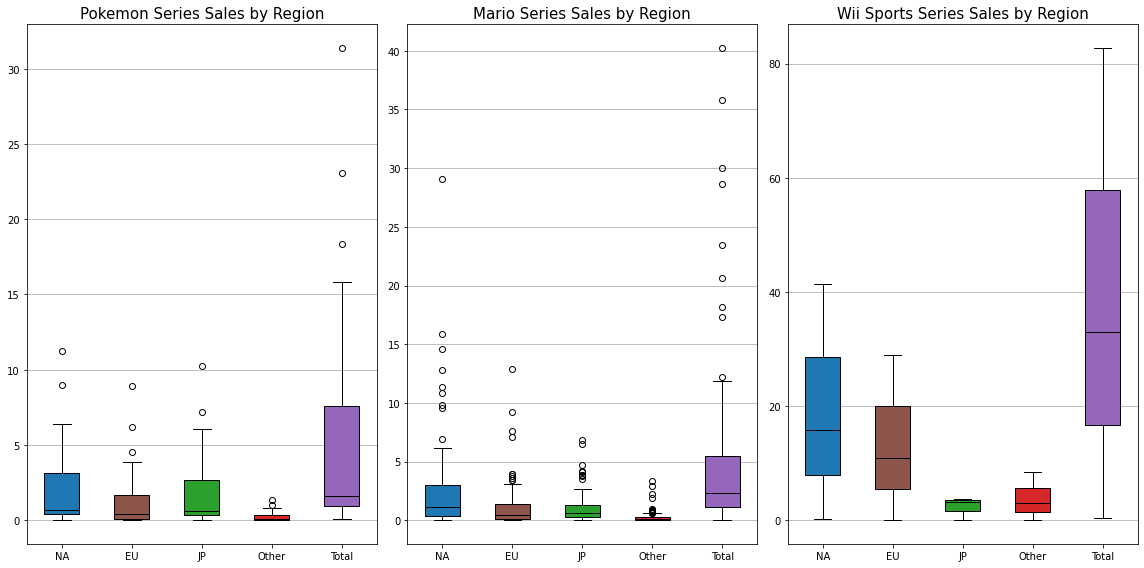

In [30]:
plt.subplot(1, 3, 1)
labels = ['NA', 'EU', 'JP', 'Other', 'Total']
colors = ['tab:blue',
          'tab:brown',
          'tab:green',
          'tab:red',
          'tab:purple']

for i, c in enumerate(labels):
    _ = plt.boxplot(pokemon.iloc[:,i + 5], 
                    labels=[c],    # <---- 박스의 컬러를 x축의 이름으로 출력한다 
                    positions=[i], # <---- x축 상의 박스의 위치를 지정한다. 
                    widths = 0.5,  # <---- 박스의 폭을 조절한다. 
                    vert = True,   # <---- 박스를 수식으로 그리도록 한다 
                    patch_artist=True, # <---- 박스의 속성을 바꿀 수 있도록 설정한다
                    boxprops=dict(facecolor=colors[i], color='k'), # <- 박스의 face와 가장자리 색을 지정
                    medianprops=dict(color='k') # <--- 중간값 선의 색 지정
                    )
plt.title('Pokemon Series Sales by Region', fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5, axis='y')    

plt.subplot(1, 3, 2)
for i, c in enumerate(labels):
    _ = plt.boxplot(mario.iloc[:,i + 5], 
                    labels=[c],    # <---- 박스의 컬러를 x축의 이름으로 출력한다 
                    positions=[i], # <---- x축 상의 박스의 위치를 지정한다. 
                    widths = 0.5,  # <---- 박스의 폭을 조절한다. 
                    vert = True,   # <---- 박스를 수식으로 그리도록 한다 
                    patch_artist=True, # <---- 박스의 속성을 바꿀 수 있도록 설정한다
                    boxprops=dict(facecolor=colors[i], color='k'), # <- 박스의 face와 가장자리 색을 지정
                    medianprops=dict(color='k') # <--- 중간값 선의 색 지정
                    )
plt.title('Mario Series Sales by Region', fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5, axis='y')    

plt.subplot(1, 3, 3)
for i, c in enumerate(labels):
    _ = plt.boxplot(wii_sports.iloc[:,i + 5], 
                    labels=[c],    # <---- 박스의 컬러를 x축의 이름으로 출력한다 
                    positions=[i], # <---- x축 상의 박스의 위치를 지정한다. 
                    widths = 0.5,  # <---- 박스의 폭을 조절한다. 
                    vert = True,   # <---- 박스를 수식으로 그리도록 한다 
                    patch_artist=True, # <---- 박스의 속성을 바꿀 수 있도록 설정한다
                    boxprops=dict(facecolor=colors[i], color='k'), # <- 박스의 face와 가장자리 색을 지정
                    medianprops=dict(color='k') # <--- 중간값 선의 색 지정
                    )
plt.title('Wii Sports Series Sales by Region', fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5, axis='y') 

plt.tight_layout()
plt.show()

## Stacked Bar Chart

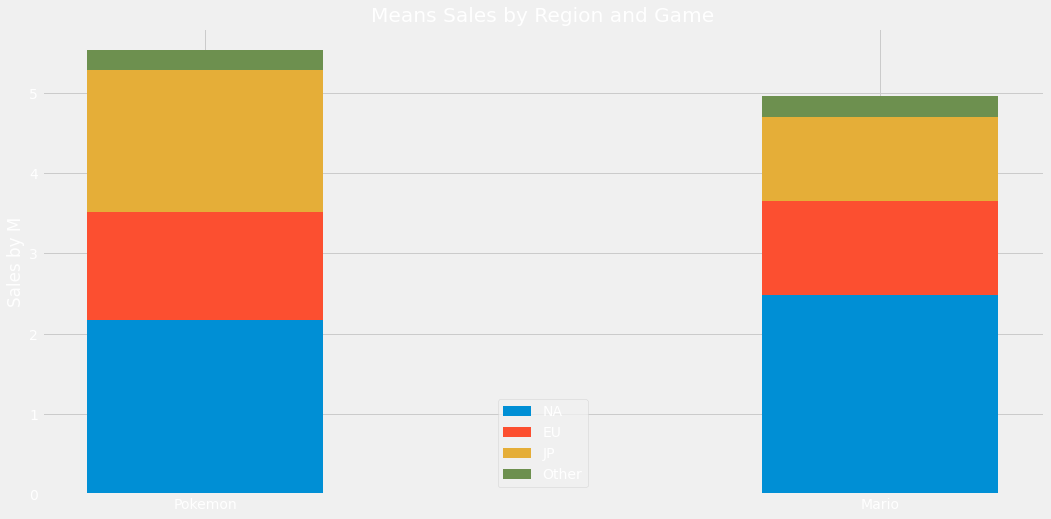

In [36]:
na_means = np.array([pokemon.describe().loc['mean', 'NA_Sales'].round(2), 
                     mario.describe().loc['mean', 'NA_Sales'].round(2)])

eu_means = np.array([pokemon.describe().loc['mean', 'EU_Sales'].round(2), 
                     mario.describe().loc['mean', 'EU_Sales'].round(2)])

jp_means = np.array([pokemon.describe().loc['mean', 'JP_Sales'].round(2), 
                     mario.describe().loc['mean', 'JP_Sales'].round(2)])

other_means = np.array([pokemon.describe().loc['mean', 'Other_Sales'].round(2), 
                        mario.describe().loc['mean', 'Other_Sales'].round(2)])


labels = ['Pokemon', 'Mario']
width = 0.35 
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.bar(labels, na_means, width, label='NA')
ax.bar(labels, eu_means, width, bottom=na_means, label='EU')
ax.bar(labels, jp_means, width, bottom=eu_means + na_means, label='JP')
ax.bar(labels, other_means, width, bottom=jp_means + eu_means + na_means, label='Other')

ax.set_ylabel('Sales by M')
ax.set_title('Means Sales by Region and Game')
ax.legend()

plt.show()

### Variance

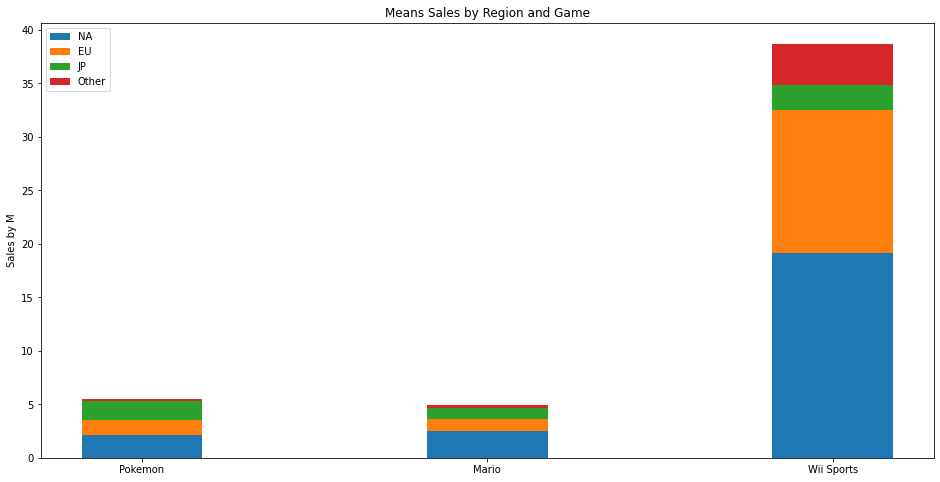

In [33]:
na_means = np.array([pokemon.describe().loc['mean', 'NA_Sales'].round(2), 
                     mario.describe().loc['mean', 'NA_Sales'].round(2),
                     wii_sports.describe().loc['mean', 'NA_Sales'].round(2)])

eu_means = np.array([pokemon.describe().loc['mean', 'EU_Sales'].round(2), 
                     mario.describe().loc['mean', 'EU_Sales'].round(2),
                     wii_sports.describe().loc['mean', 'EU_Sales'].round(2)])

jp_means = np.array([pokemon.describe().loc['mean', 'JP_Sales'].round(2), 
                     mario.describe().loc['mean', 'JP_Sales'].round(2),
                     wii_sports.describe().loc['mean', 'JP_Sales'].round(2)])

other_means = np.array([pokemon.describe().loc['mean', 'Other_Sales'].round(2), 
                        mario.describe().loc['mean', 'Other_Sales'].round(2),
                        wii_sports.describe().loc['mean', 'Other_Sales'].round(2)])


labels = ['Pokemon', 'Mario', 'Wii Sports']
width = 0.35 

fig, ax = plt.subplots()

ax.bar(labels, na_means, width, label='NA')
ax.bar(labels, eu_means, width, bottom=na_means, label='EU')
ax.bar(labels, jp_means, width, bottom=eu_means + na_means, label='JP')
ax.bar(labels, other_means, width, bottom=jp_means + eu_means + na_means, label='Other')

ax.set_ylabel('Sales by M')
ax.set_title('Means Sales by Region and Game')
ax.legend()

plt.show()

# 추가

In [67]:
line_df = game.copy()

In [69]:
line_df = line_df.groupby(by = ['Year'])

In [75]:
line_df = line_df.sum()

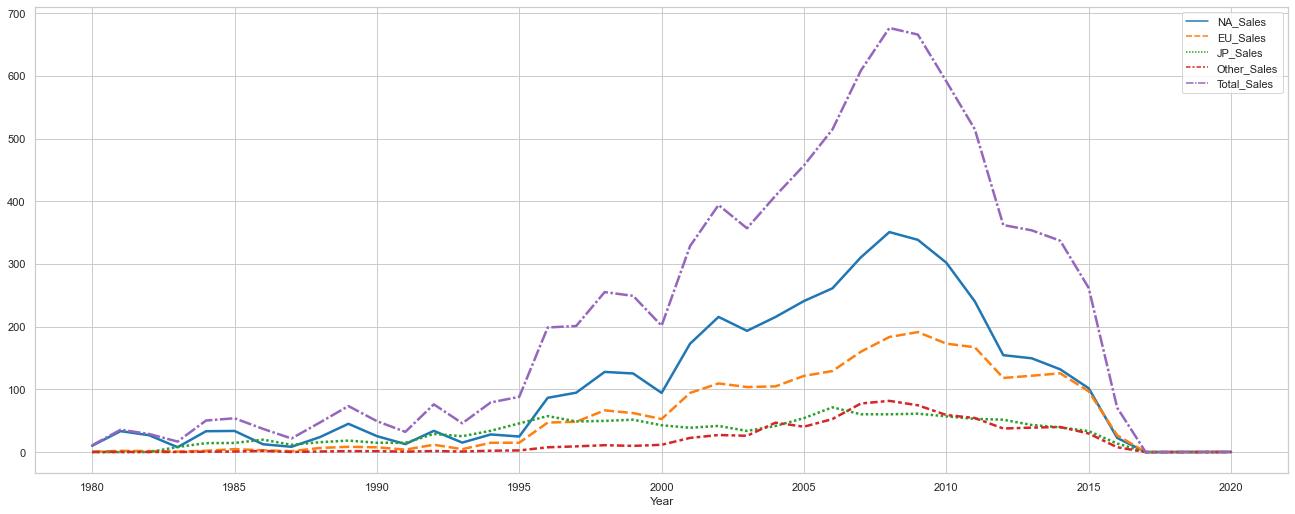

In [79]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=line_df, palette="tab10", linewidth=2.5)
plt.show()